In [9]:
%pylab inline
import scipy.stats
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [24]:

alpha_A = 4.0
alpha_B = .3
beta = 0.6


r_rv = scipy.stats.norm(scale=np.sqrt(beta))
def sample_ab():
    r = r_rv.rvs(1)
    a = alpha_A * scipy.stats.norm.rvs(loc=r, scale=np.sqrt(1-beta))
    b = alpha_B * scipy.stats.norm.rvs(loc=r, scale=np.sqrt(1-beta))
    return float(a), float(b)

a_samples, b_samples = zip(*[sample_ab() for i in range(100000)])

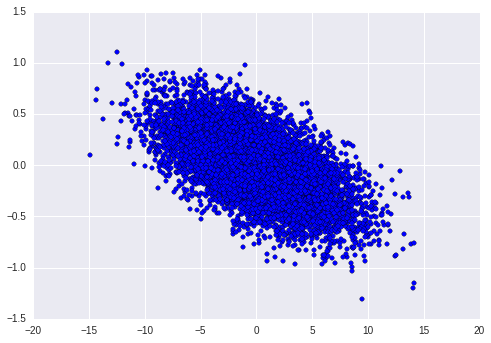

In [19]:
scatter(a_samples, b_samples)

In [25]:
np.cov(a_samples, b_samples, bias=1)

array([[ 15.93104887,   0.716862  ],
       [  0.716862  ,   0.09018136]])

In [32]:
C = np.array(((alpha_A**2, alpha_A * alpha_B * beta), (alpha_A * alpha_B * beta, alpha_B**2)))
print np.linalg.det(C)
print np.linalg.inv(C)

0.9216
[[  0.09765625  -0.78125   ]
 [ -0.78125     17.36111111]]


In [31]:
detC = (alpha_A * alpha_B)**2 * (1-beta**2)
print detC

invC = 1/(1-beta**2) * np.array(((1.0/alpha_A**2, -beta / (alpha_A * alpha_B)), (-beta/ (alpha_A * alpha_B), 1.0/alpha_B**2)))
print invC

0.9216
[[  0.09765625  -0.78125   ]
 [ -0.78125     17.36111111]]


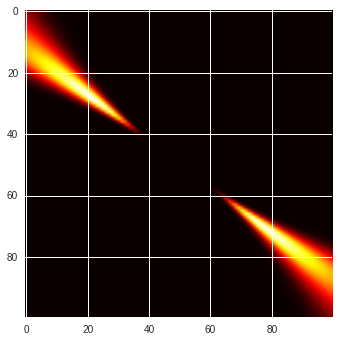

In [102]:
A = 3.0
B = 4.0
beta = 0.99
AB = np.array(((A, B),)).reshape((-1, 1))
def lik_alphas(v):
    aA, aB = v
    detC = (aA * aB)**2 * (1-beta**2)
    invC = 1/(1-beta**2) * np.array(((1.0/aA**2, -beta / (aA * aB)), (-beta/ (aA * aB), 1.0/aB**2)))
    lp = -.5 * np.dot(AB.T, np.dot(invC, AB)) - .5 * np.log(detC)
    return lp

n = 100
As = np.linspace(-5, 5, n)
Bs = np.linspace(-5, 5, n)
ll = np.empty((n,n))
for i, aA in enumerate(As):
    for j, aB in enumerate(Bs):
        ll[i,j] = lik_alphas((aA, aB))
imshow(np.exp(ll), cmap='hot')

In [103]:
v0 = np.array((3., 4.0))
ff = lambda x : -lik_alphas(x)
r = scipy.optimize.minimize(ff, v0)

In [104]:
print r

   status: 0
  success: True
     njev: 10
     nfev: 40
 hess_inv: array([[ 1.13134065,  1.48161766],
       [ 1.48161766,  2.02019613]])
      fun: 0.8382542374266764
        x: array([ 2.12664217,  2.83552288])
  message: 'Optimization terminated successfully.'
      jac: array([  2.38418579e-07,   1.11758709e-07])
      nit: 6


In [105]:
3.0/2.12664217

1.4106745565004948

In [106]:
4.0/2.83552288

1.410674563133837

In [109]:
sqrt(1.99)

1.4106735979665885